In [1]:
import os
import pandas as pd

#data path 수정
os.chdir("C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data")
os.getcwd()

'C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data'

In [3]:
from matplotlib import pyplot as plt
from skimage import measure, morphology
import pydicom as dicom
import numpy as np
import cv2
import skimage.transform

X=np.load('data_X_origin.npy',allow_pickle=True)
y=np.load('data_y.npy',allow_pickle=True)

In [4]:
print(X.shape)
print(y.shape)

(2861, 224, 224, 3)
(2861, 4)


In [5]:
y[4]

array([1., 0., 0., 0.], dtype=float32)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

# 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224,224,3)))
model.add(Conv2D(8, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

Using TensorFlow backend.


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# 모델 학습시키기
#train
history=model.fit(
    X,
    y,
    batch_size=32,
    epochs=10,
    validation_split=0.2)

Train on 2288 samples, validate on 573 samples
Epoch 1/10
2288/2288 [==============================] - 27s 12ms/step - loss: 15657.5311 - accuracy: 0.4034 - val_loss: 3.6636 - val_accuracy: 0.0000e+00
Epoch 2/10
2288/2288 [==============================] - 19s 8ms/step - loss: 1.6218 - accuracy: 0.4716 - val_loss: 2.6314 - val_accuracy: 0.0052
Epoch 3/10
2288/2288 [==============================] - 20s 9ms/step - loss: 1.2109 - accuracy: 0.4969 - val_loss: 2.9201 - val_accuracy: 0.0017
Epoch 4/10
2288/2288 [==============================] - 19s 8ms/step - loss: 1.1794 - accuracy: 0.5009 - val_loss: 3.2758 - val_accuracy: 0.0000e+00
Epoch 5/10
2288/2288 [==============================] - 19s 8ms/step - loss: 1.1676 - accuracy: 0.5009 - val_loss: 3.6559 - val_accuracy: 0.0000e+00
Epoch 6/10
2288/2288 [==============================] - 19s 8ms/step - loss: 1.1632 - accuracy: 0.5013 - val_loss: 4.1340 - val_accuracy: 0.0000e+00
Epoch 7/10
2288/2288 [==============================] - 20s 9m

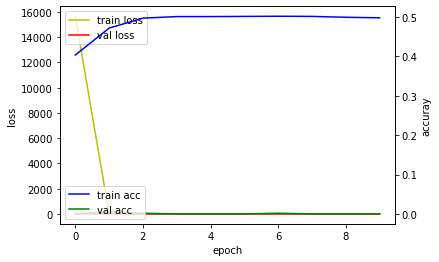

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')

acc_ax.plot(acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [10]:
model.save('CNN_origin data.h5')

In [ ]:
X_test=np.load('X_test.npy')
y_test=np.load('y_test.npy')

In [ ]:
# 성능 측정
loss,metrics = model.evaluate()
print('## evaluation loss and_metrics ##')
print("loss :",loss)
print("accuracy :", metrics)